In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from flask import Flask, jsonify

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

Base = automap_base()

In [2]:
engine = create_engine('sqlite://', echo = False)

In [3]:
Plastic_df = pd.read_excel("Plastic Data.xlsx")
Plastic_df.head()

,ID,Reference,Continent,Latitude (N),Longitude €,Distance_land (miles),Habitat_Type,Water_Depth (m),Mean Population in 110 km radius (no. people km-2),Sampling_date,...,Abundance_fibers (n kg-1),Abundance_Non-fibrous (n kg-1),Estimated_proportion,Estimated_Fibers (n kg-1),Estimated_Non-fibrous (n kg-1),Corrected_Fibers (n kg-1),Corrected_Non-Fibrous (n kg-1),Corrected_Fibers (n cm-3),Corrected_Non-Fibrous (n cm-3),Sediment_accretion (cm y-1)
0,1,1,Asia,33.0,122.21,0.07,Continental_shelf,12.0,0.000000,2017.0,...,509.60,50.4,0.91,509.60,50.40,2817.023270,278.606697,1.719439,0.170054,0.131824
1,2,1,Asia,34.0,121.24,0.06,Continental_shelf,19.0,180.813815,2017.0,...,2841.60,118.4,0.96,2841.60,118.40,15708.110916,654.504622,9.587829,0.399493,0.130903
2,3,1,Asia,36.0,121.00,0.02,Continental_shelf,20.0,1086.828963,2017.0,...,3513.60,146.4,0.96,3513.60,146.40,19422.866876,809.286120,11.855221,0.493968,0.130772
3,4,1,Asia,33.0,123.00,0.10,Continental_shelf,29.0,0.000000,2017.0,...,1534.95,360.05,0.81,1534.95,360.05,8485.066459,1990.324231,5.179067,1.214843,0.129598
4,5,1,Asia,35.0,121.00,0.09,Continental_shelf,36.0,988.463074,2017.0,...,1731.73,171.27,0.91,1731.73,171.27,9572.848718,946.765258,5.843022,0.577881,0.128692


In [4]:
Plastic_df[(Plastic_df["Continent"]=="Asia")]

,ID,Reference,Continent,Latitude (N),Longitude €,Distance_land (miles),Habitat_Type,Water_Depth (m),Mean Population in 110 km radius (no. people km-2),Sampling_date,...,Abundance_fibers (n kg-1),Abundance_Non-fibrous (n kg-1),Estimated_proportion,Estimated_Fibers (n kg-1),Estimated_Non-fibrous (n kg-1),Corrected_Fibers (n kg-1),Corrected_Non-Fibrous (n kg-1),Corrected_Fibers (n cm-3),Corrected_Non-Fibrous (n cm-3),Sediment_accretion (cm y-1)
0,1,1,Asia,33.000000,122.210000,0.07,Continental_shelf,12.0,0.000000,2017.0,...,509.600000,50.4,0.9100,509.600000,50.400000,2817.023270,278.606697,1.719439,0.170054,0.131824
1,2,1,Asia,34.000000,121.240000,0.06,Continental_shelf,19.0,180.813815,2017.0,...,2841.600000,118.4,0.9600,2841.600000,118.400000,15708.110916,654.504622,9.587829,0.399493,0.130903
2,3,1,Asia,36.000000,121.000000,0.02,Continental_shelf,20.0,1086.828963,2017.0,...,3513.600000,146.4,0.9600,3513.600000,146.400000,19422.866876,809.286120,11.855221,0.493968,0.130772
3,4,1,Asia,33.000000,123.000000,0.10,Continental_shelf,29.0,0.000000,2017.0,...,1534.950000,360.05,0.8100,1534.950000,360.050000,8485.066459,1990.324231,5.179067,1.214843,0.129598
4,5,1,Asia,35.000000,121.000000,0.09,Continental_shelf,36.0,988.463074,2017.0,...,1731.730000,171.27,0.9100,1731.730000,171.270000,9572.848718,946.765258,5.843022,0.577881,0.128692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1349,93,Asia,12.013878,79.860753,0.00,Beach,0.0,712.901297,2019.0,...,180.804000,959.196,0.1586,180.804000,959.196000,7423.561558,39383.257851,11.489101,60.951638,0.133419
1349,1350,93,Asia,12.013878,79.860753,0.00,Beach,0.0,712.901297,2019.0,...,214.110000,1135.89,0.1586,214.110000,1135.890000,8791.059740,46638.068508,13.605515,72.179572,0.133419
1360,1361,96,Asia,1.224472,103.852056,0.00,Beach,0.0,597.369795,2018.0,...,3.846803,3.846803,0.5000,3.846803,3.846803,564.559740,564.559740,0.390384,0.390384,0.133419
1361,1362,96,Asia,1.392417,103.978917,0.00,Beach,0.0,632.716665,2018.0,...,34.698854,46.373235,0.4280,34.698854,46.373235,5092.430727,6805.771906,3.521331,4.706078,0.133419


In [5]:
References_df = pd.read_excel("Plastic Data.xlsx", sheet_name = 3)
References_df.head()

,Reference,Central size (mm),Weight (mg)
0,9,3.000,0.800000
1,28,3.555,47.930556
2,28,3.555,25.280000
3,28,3.555,24.000000
4,28,3.555,26.705882


In [6]:
Plastic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID                                                  1649 non-null   int64  
 1   Reference                                           1649 non-null   int64  
 2   Continent                                           1643 non-null   object 
 3   Latitude (N)                                        1649 non-null   float64
 4   Longitude €                                         1649 non-null   float64
 5   Distance_land (miles)                               1595 non-null   float64
 6   Habitat_Type                                        1649 non-null   object 
 7   Water_Depth (m)                                     1649 non-null   float64
 8   Mean Population in 110 km radius (no. people km-2)  1649 non-null   float64
 9

<Axes: >

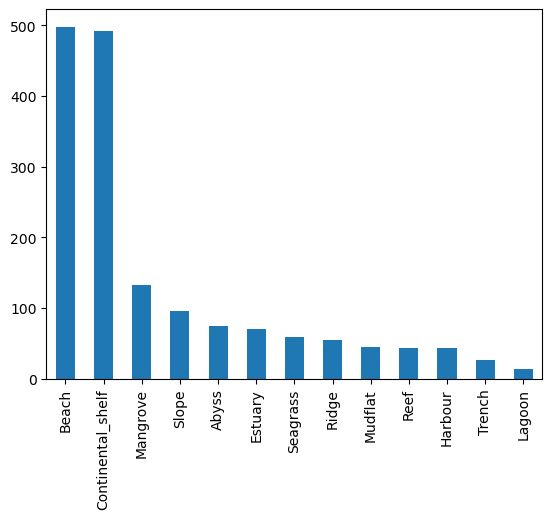

In [7]:
Plastic_df["Habitat_Type"].value_counts().plot(kind="bar")

<Axes: xlabel='Abundance_fibers (n kg-1)', ylabel='Estimated_Fibers (n kg-1)'>

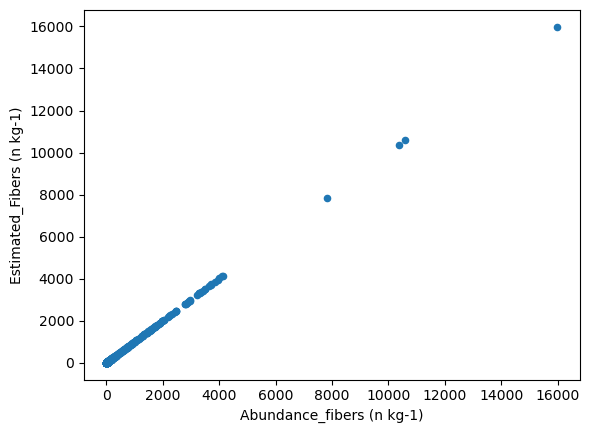

In [8]:
Plastic_df.plot(kind="scatter", x = "Abundance_fibers (n kg-1)" , y = "Estimated_Fibers (n kg-1)")

In [9]:
Plastic_df.to_sql('oceanplastic', con=engine, if_exists="replace", index=False)

1649

In [10]:
with engine.connect() as conn:
    result = conn.execute("SELECT * FROM oceanplastic").fetchall()
    for i in result:
        print(i)

(1, 1, 'Asia', 33.0, 122.21, 0.07, 'Continental_shelf', 12.0, 0.0, 2017.0, 'Manual collection', 50.0, 5.48921528, 5.0, 'NaI', 99.3, 'Visual with microscope', 'YES', 'YES', 0.0, 3.0, 1.5, 3.0, 0.610374409, 'Poirier 2006', 'Poirier_2006_https://doi.org/10.1594/PANGAEA.707809_Pangaea', 1.0, '560', None, None, 'n kg-1 ', 560.0, 0.91, 509.6, '50.4', 0.91, 509.6, 50.39999999999998, 2817.0232695750256, 278.60669699093637, 1.7194389133061039, 0.17005439801928485, 0.1318241227762269)
(2, 1, 'Asia', 34.0, 121.24, 0.06, 'Continental_shelf', 19.0, 180.81381545144, 2017.0, 'Manual collection', 50.0, 5.48921528, 5.0, 'NaI', 99.3, 'Visual with microscope', 'YES', 'YES', 0.0, 3.0, 1.5, 3.0, 0.610374409, 'Poirier 2006', 'Poirier_2006_https://doi.org/10.1594/PANGAEA.707809_Pangaea', 1.0, '2960', None, None, 'n kg-1 ', 2960.0, 0.96, 2841.6, '118.4', 0.96, 2841.6, 118.40000000000009, 15708.110916060423, 654.5046215025181, 9.587828916896829, 0.39949287153736823, 0.13090283430916907)
(3, 1, 'Asia', 36.0, 12

In [11]:
from sqlalchemy import inspect
inspector = inspect(engine)
schemas = inspector.get_schema_names()

for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        for column in inspector.get_columns(table_name, schema=schema):
            print("Column: %s" % column)

schema: main
Column: {'name': 'ID', 'type': BIGINT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Reference ', 'type': BIGINT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Continent', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Latitude (N)', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Longitude €', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Distance_land (miles)', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Habitat_Type', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'Water_Depth (m)', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincre

In [12]:
with engine.connect() as conn:
    result = conn.execute("SELECT * FROM oceanplastic WHERE Continent='Asia'").fetchall()
    print(len(result))

600


In [13]:
for row in result:
        print("TEST:", row["ID"])

TEST: 1
TEST: 2
TEST: 3
TEST: 4
TEST: 5
TEST: 6
TEST: 7
TEST: 8
TEST: 9
TEST: 10
TEST: 11
TEST: 12
TEST: 13
TEST: 14
TEST: 15
TEST: 16
TEST: 17
TEST: 18
TEST: 19
TEST: 20
TEST: 21
TEST: 22
TEST: 23
TEST: 24
TEST: 25
TEST: 26
TEST: 34
TEST: 35
TEST: 36
TEST: 37
TEST: 38
TEST: 39
TEST: 40
TEST: 41
TEST: 42
TEST: 43
TEST: 44
TEST: 45
TEST: 46
TEST: 47
TEST: 48
TEST: 49
TEST: 50
TEST: 51
TEST: 52
TEST: 53
TEST: 54
TEST: 55
TEST: 56
TEST: 57
TEST: 58
TEST: 59
TEST: 60
TEST: 61
TEST: 62
TEST: 63
TEST: 64
TEST: 65
TEST: 66
TEST: 67
TEST: 68
TEST: 69
TEST: 238
TEST: 239
TEST: 241
TEST: 252
TEST: 253
TEST: 254
TEST: 255
TEST: 256
TEST: 257
TEST: 258
TEST: 259
TEST: 260
TEST: 261
TEST: 262
TEST: 263
TEST: 264
TEST: 265
TEST: 266
TEST: 267
TEST: 268
TEST: 269
TEST: 270
TEST: 271
TEST: 272
TEST: 273
TEST: 293
TEST: 294
TEST: 295
TEST: 296
TEST: 297
TEST: 298
TEST: 299
TEST: 300
TEST: 301
TEST: 302
TEST: 303
TEST: 304
TEST: 396
TEST: 397
TEST: 398
TEST: 399
TEST: 400
TEST: 401
TEST: 402
TEST: 403
T

In [16]:
with engine.connect() as conn:
    results = conn.execute("SELECT COUNT(ID), Continent FROM oceanplastic GROUP BY Continent ORDER BY COUNT(ID) DESC;").fetchall()
    print(result)

[(600, 'Asia'), (417, 'Europe'), (144, 'EEZ'), (99, 'High seas'), (89, 'America'), (84, 'Australia'), (66, 'Antarctica'), (54, 'Africa'), (24, 'United Kingdom'), (20, 'South America'), (13, 'China'), (12, 'Caribbean'), (10, 'Saudi Arabia'), (10, 'Oceania'), (6, None), (1, 'North America')]


In [16]:
# Set up a list of GeoJSON points to push
result_list = []
for row in result:
    # Base GeoJSON Template
    feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                # coordinates go here
            },
            "properties": {
                # everything else goes here
            }
        }

    # Fill in the rest of the desired details here
    feature["geometry"]["coordinates"]=[row['Longitude €'], row['Latitude (N)']]

    # Append completed GeoJSON to list
    result_list.append(feature)

print(result_list)

[{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [122.21, 33.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [121.24, 34.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [121.0, 36.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [123.0, 33.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [121.0, 35.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [121.4, 36.0]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [122.19, 35.3]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [122.19, 35.3]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [122.19, 35.3]}, 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [122.19, 35.3]}, 'properties'